<a href="https://colab.research.google.com/github/yinanazhou/Music-Emotion/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MUMT621

Mounted at /content/drive
/content/drive/MyDrive/MUMT621


## Import

In [ ]:
!pip install pydub

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


## Dataset

### Download Dataset

In [ ]:
!pip install wget
import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'http://mir.dei.uc.pt/resources/MIREX-like_mood.zip'

### Transfer mp3 file to wav

In [ ]:
import os
from pathlib import Path
def change2wav(InDir, OutDir):
  fs = 22000
  for filename in os.listdir(InDir):
    if filename.endswith(".mp3"):
      InName = os.path.join(InDir, filename)
      OutName = os.path.join(OutDir, Path(InName).stem + ".wav")
      audio = AudioSegment.from_mp3(InName)
      audio = audio.set_frame_rate(fs)
      audio = audio.set_channels(1)
      audio.export(OutName, format="wav")

In [ ]:
InDir = "/content/drive/My Drive/MUMT621/dataset/Audio"
OutDir = "/content/drive/My Drive/MUMT621/dataset/Wave"
change2wav(InDir,OutDir)
print('DONE!')

DONE!


In [ ]:
path, dirs, files = next(os.walk("/content/drive/My Drive/MUMT621/dataset/Audio"))
print(len(files))

903


In [ ]:
path, dirs, files = next(os.walk("/content/drive/My Drive/MUMT621/dataset/Wave"))
print(len(files))

903


### Generate label csv

In [3]:
import pandas as pd

In [ ]:
clusters = pd.read_csv("/content/drive/MyDrive/MUMT621/dataset/clusters.txt",header=None)
clusters.columns=['cluster']
clusters.insert(0,'id',[*range(1,904)])
clusters.to_csv("/content/drive/MyDrive/MUMT621/dataset/clusters.csv")

In [ ]:
clusters.columns

Index(['id', 'cluster'], dtype='object')

In [ ]:
clusters.shape

(903, 2)

### Generate lyrics csv

In [ ]:
import glob
import os
import pandas as pd
from pathlib import Path
file_list = glob.glob(os.path.join(os.getcwd(), "/content/drive/My Drive/MUMT621/dataset/Lyrics", "*.txt"))

lyrics = []
id = []

for file_path in file_list:
    with open(file_path, encoding="latin-1") as f_input:
        lyrics.append(f_input.read())
        id.append(Path(file_path).stem)

df = pd.DataFrame({'id': id, 'lyrics':lyrics})
id = [int(i) for i in id] 
df.sort_values('id',inplace=True,ignore_index=True)
print (df.shape)

df.to_csv('/content/drive/MyDrive/MUMT621/dataset/lyrics.csv')

(764, 2)


In [ ]:
path, dirs, files = next(os.walk("/content/drive/My Drive/MUMT621/dataset/Lyrics"))
print(len(files))

764


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MUMT621/dataset/lyrics.csv")
df = df.iloc[: , 1:]
df.to_csv('/content/drive/MyDrive/MUMT621/dataset/lyrics.csv')

### distribution

In [66]:
# id & lyrics
df = pd.read_csv("/content/drive/MyDrive/MUMT621/dataset/lyrics.csv")
# all labels
clusters = pd.read_csv("/content/drive/MyDrive/MUMT621/dataset/clusters.csv")

In [63]:
# lyrics labels
cluster = pd.DataFrame(columns=['cluster'])

In [64]:
for index in df.id:
  temp = pd.DataFrame(clusters.loc[clusters.id==index,'cluster'],columns=['cluster'])
  cluster=cluster.append(temp, ignore_index=True)

In [90]:
# cluster label according to lyrics
labels = pd.DataFrame()
labels = pd.concat([df.id,cluster.cluster],axis = 1)
# labels.to_csv('/content/drive/MyDrive/MUMT621/dataset/labels.csv')

In [88]:
labels

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

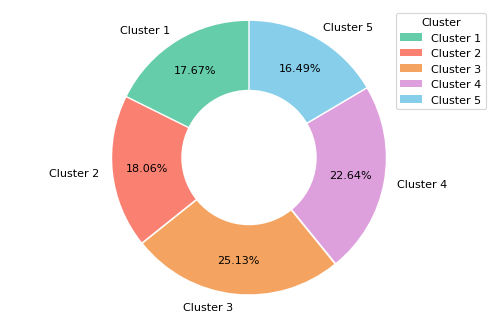

In [120]:
# draw distribution

y_labels = labels.cluster

plt.figure(figsize=(7.8,5),dpi=80) # fig size
plt_labels = list(Counter(y_labels).keys()) # label
sizes = list(Counter(y_labels).values())

colors = ['mediumaquamarine','salmon','sandybrown','plum','skyblue'] # color of each sector
explode = (0.01,0.01,0.01,0.01,0.01)
patches,text1,text2 = plt.pie(sizes,   
                      explode = explode,         
                      labels=plt_labels,
                      colors=colors,
                      # labeldistance = 1.2,
                      labeldistance = 1.1,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle = 90, 
                      pctdistance = 0.75) 
# draw the circle to make donut
circle = plt.Circle((0,0),0.5,fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
# patches: pie chart，texts1: label text，texts2: pie chart text
plt.axis('equal')
plt.legend(title = 'Cluster',loc='upper right')
plt.savefig('piechart.png')
plt.show()

In [121]:
# number of tracks of each cluster
sizes

[135, 138, 192, 173, 126]